# Import Data

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df = pd.read_csv('Household_solid_waste_audit_Belize_data.csv')
df

,ID,Premisestype,Date,Item,Material,Measure,Site,Type,Collection_frequency,Collection_efficiency,Value,Correted_value
0,1,pt_household,08/06/2019 00:00:00,lpb_flav_water_soft_drink__non_carbonated__150ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
1,1,pt_household,08/06/2019 00:00:00,lpb_flav_water_soft_drink__non_carbonated__150...,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
2,1,pt_household,08/06/2019 00:00:00,lpb_flav_water_soft_drink__non_carbonated__500...,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
3,1,pt_household,08/06/2019 00:00:00,lpb_flav_water_soft_drink__non_carbonated__100...,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
4,1,pt_household,08/06/2019 00:00:00,lpb_flav_water_soft_drink__non_carbonated__3000ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
5,1,pt_household,08/06/2019 00:00:00,lpb_other_150ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
6,1,pt_household,08/06/2019 00:00:00,lpb_other_150_500ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
7,1,pt_household,08/06/2019 00:00:00,lpb_other_500_1000ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
8,1,pt_household,08/06/2019 00:00:00,lpb_other_1000_3000ml,lpb container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000
9,1,pt_household,08/06/2019 00:00:00,hdpe_drink_pouches_1000_3000ml,hdpe container,count,Bullet Tree Falls,Rural,30.0,0.0,0.0,0.000000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95182 entries, 0 to 95181
Data columns (total 12 columns):
ID                       95182 non-null int64
Premisestype             95182 non-null object
Date                     95182 non-null object
Item                     95182 non-null object
Material                 95182 non-null object
Measure                  95182 non-null object
Site                     95031 non-null object
Type                     95182 non-null object
Collection_frequency     95182 non-null float64
Collection_efficiency    95182 non-null float64
Value                    95182 non-null float64
Correted_value           95182 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 8.7+ MB


In [3]:
for column in df.columns:
    print(f'{column} - Value Counts:')
    print(df[column].value_counts(normalize=True).head(10))
    print(f'Unique values: {df[column].nunique()}')
    print('--------------------------------------')

ID - Value Counts:
127    0.004528
145    0.004528
89     0.004528
216    0.004528
152    0.004528
88     0.004528
215    0.004528
151    0.004528
87     0.004528
214    0.004528
Name: ID, dtype: float64
Unique values: 223
--------------------------------------
Premisestype - Value Counts:
pt_household    0.944076
pt_litter       0.054338
0               0.001586
Name: Premisestype, dtype: float64
Unique values: 3
--------------------------------------
Date - Value Counts:
05/06/2019 00:00:00    0.135845
03/06/2019 00:00:00    0.135845
14/06/2019 00:00:00    0.131317
04/06/2019 00:00:00    0.131317
10/06/2019 00:00:00    0.126789
06/06/2019 00:00:00    0.099620
08/06/2019 00:00:00    0.090563
07/06/2019 00:00:00    0.054338
11/06/2019 00:00:00    0.045282
31/05/2019 00:00:00    0.040029
Name: Date, dtype: float64
Unique values: 11
--------------------------------------
Item - Value Counts:
other                                         0.034460
cardboard                                 

# Data Cleaning

## Remove Uncollected Items 

In [4]:
#Remove rows without a value to only leave items actually collected per household
df = df[df.Value > 0]
df = df[df.Item != 'total_sample']
print(f'There are {len(df)} records remaining in the filtered dataset')

There are 6466 records remaining in the filtered dataset


## Determine Which Measure is most Accurate 

In [5]:
for measure in df.Measure.unique():
    print(f'There are {len(df[df.Measure == measure])} rows with the measure:', measure)

There are 1671 rows with the measure: count
There are 2465 rows with the measure: weight
There are 2330 rows with the measure: volume


**Okay so we see that the measure used the most is weight, this is good as it provides the kg metric that we need to do our future calculations.  The summary of this undertaking written by CEFAS explains that 'Beverage containers were sorted and counted separately', though it does not state why.  It is clear looking at the value counts below that all items with an 'ml' in them only appear a few times as they are not repeated with the measure of 'weight' or 'volume' at all.**

**For now, let's leave out 'count' and 'volume' and continue with 'weight'.**

In [6]:
df = df[df.Measure == 'weight']
df.head()

,ID,Premisestype,Date,Item,Material,Measure,Site,Type,Collection_frequency,Collection_efficiency,Value,Correted_value
289,1,pt_household,08/06/2019 00:00:00,eps,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.010,0.000333
295,1,pt_household,08/06/2019 00:00:00,plastic_bags,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.026,0.000867
313,1,pt_household,08/06/2019 00:00:00,pet_bottles,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.030,0.001000
346,1,pt_household,08/06/2019 00:00:00,pp,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.017,0.000567
349,1,pt_household,08/06/2019 00:00:00,flexibles_film,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.066,0.002200


## Item Feature Cleaning

## Remove Low Occurring Items (< 10)

In [7]:
df['Item'].value_counts(ascending=True, dropna=False)

seafood_plastic                                 1
end_of_life_vehicles                            1
fines                                           1
other_batteries                                 1
cigarette_butts                                 1
toner_cartridges                                1
hazardous                                       3
electrical_items_and_peripherals__inc_tvs_      5
ceramics                                        5
computer_equipment                              5
used_lead_acid_batteries                        6
pharmaceutical                                  7
medical_waste                                   7
wood_timber                                     9
plastic_oil_containers                          9
bottles_wine_and_spirits                       21
bottles_cds                                    28
aluminium_cans                                 38
drinkbags                                      40
nappies                                        41


In [8]:
def items_to_drop(min_num, df):
    '''
    DocString!!!!
    '''
    drop_df = pd.DataFrame()
    
    drop_df['Items'] = df['Item'].value_counts(ascending=True, dropna=False).index
    drop_df['Count'] = df['Item'].value_counts(ascending=True, dropna=False).values
    
    drop_list = drop_df[drop_df['Count'] < min_num]['Items'].values
    
    return drop_list

In [9]:
drop_items= items_to_drop(10, df)
df['Item'] = df['Item'].map(lambda x:'drop' if x in drop_items else x)
df = df[df['Item'] != 'drop']
df['Item'].value_counts()

other                          239
flexibles_film                 203
plastic_bags                   195
pet_bottles                    181
food                           177
eps                            156
paper                          145
aluminium_recyclable           136
steel_cans                     123
hdpe_bottles                   108
pp                             104
cardboard                       89
feminine_hygiene                71
textiles                        71
lpb                             68
drinking_water_plastic_bags     60
jars                            59
other_sanitary_waste            50
nappies                         41
drinkbags                       40
aluminium_cans                  38
bottles_cds                     28
bottles_wine_and_spirits        21
Name: Item, dtype: int64

In [10]:
df['Item'] = df['Item'].map(lambda x: 'drinkbags' if x == 'drinking_water_plastic_bags' else x)
df['Item'].value_counts().head(12)

other                   239
flexibles_film          203
plastic_bags            195
pet_bottles             181
food                    177
eps                     156
paper                   145
aluminium_recyclable    136
steel_cans              123
hdpe_bottles            108
pp                      104
drinkbags               100
Name: Item, dtype: int64

### Most Frequent Items by Weight

In [11]:
df[df.Measure == 'weight'].groupby("Item").sum()

,ID,Collection_frequency,Collection_efficiency,Value,Correted_value
Item,,,,,
aluminium_cans,8113,167.5,11.583333,1.517,0.515932
aluminium_recyclable,20323,626.5,37.733333,7.385,2.243326
bottles_cds,6580,82.5,5.033333,17.072,6.647669
bottles_wine_and_spirits,4268,81.0,6.583333,17.535,6.124339
cardboard,11289,378.5,18.200000,22.841,9.127677
drinkbags,22326,593.0,26.883333,4.415,3.221950
eps,23923,716.0,41.033333,11.413,5.264605
feminine_hygiene,8910,325.5,23.559524,26.601,13.939366
flexibles_film,30943,898.0,50.309524,26.686,11.356809


## Rename 'Other' Items by Material Given

In [12]:
df.reset_index(drop=True, inplace=True)

for material in df.Material.unique():
    mat_items = df[df['Material'] == material]['Item'].value_counts().index
    for item in mat_items.values:
        if item == 'other':
            mat_idxs = df[(df['Material'] == material) & (df['Item'] == item)].index
            for idx in mat_idxs.values:
                df.iloc[idx, df.columns.get_loc('Item')] = f'other_{material}'
                
for material in df.Material.unique():
    print(f'{material} Value Counts:')
    print(df[df.Material == material]['Item'].value_counts().head())
    print('---------------------------------')

plastic Value Counts:
flexibles_film    203
plastic_bags      195
pet_bottles       181
eps               156
other_plastic     130
Name: Item, dtype: int64
---------------------------------
hygiene Value Counts:
feminine_hygiene        71
other_sanitary_waste    50
nappies                 41
Name: Item, dtype: int64
---------------------------------
paper_and_cardboard Value Counts:
paper        145
cardboard     89
lpb           68
Name: Item, dtype: int64
---------------------------------
metal Value Counts:
aluminium_recyclable    136
steel_cans              123
aluminium_cans           38
other_metal              13
Name: Item, dtype: int64
---------------------------------
glass_glass Value Counts:
jars                        59
bottles_cds                 28
bottles_wine_and_spirits    21
other_glass_glass            8
Name: Item, dtype: int64
---------------------------------
organics Value Counts:
food              177
other_organics     48
Name: Item, dtype: int64
-----------

# Feature Engineering

## Total Weight per Household

**Now lets make a quick list showing all of the total waste collected per house ID.  This will be useful later after we have transformed the dataset to reflect one row per household.**

In [13]:
df[df.Item != 'total_sample'].groupby('ID').sum()

,Collection_frequency,Collection_efficiency,Value,Correted_value
ID,,,,
1,240.0,0.000000,0.534,0.017800
2,510.0,0.000000,4.863,0.162100
3,330.0,0.000000,2.957,0.098567
4,0.0,0.000000,0.390,0.097500
5,300.0,0.000000,3.077,0.102567
6,450.0,0.000000,6.328,0.210933
7,360.0,0.000000,4.713,0.157100
8,420.0,0.000000,4.613,0.153767
9,420.0,0.000000,2.157,0.071900


In [14]:
total_sample_df = pd.DataFrame()
total_sample_df['ID'] = df['ID'].unique()
total_sample_df['Total_weight (kg)'] = df[df.Item != 'total_sample'].groupby('ID').sum()['Value'].values
total_sample_df

,ID,Total_weight (kg)
0,1,0.534
1,2,4.863
2,3,2.957
3,4,0.390
4,5,3.077
5,6,6.328
6,7,4.713
7,8,4.613
8,9,2.157
9,10,4.001


## Consolidate Materials for Composition Calculations

In [15]:
df_comp = df.reset_index(drop=True)
df_comp.Material.value_counts()

plastic                1177
metal                   310
paper_and_cardboard     302
organics                225
hygiene                 162
glass_glass             116
other                   111
Name: Material, dtype: int64

In [16]:
df_comp[df_comp['Material'] == 'other']['Item'].value_counts()

textiles       71
other_other    40
Name: Item, dtype: int64

In [17]:
# Here we are grouping 'textiles' under the paper_and_cardboard for simplicity
for idx in df_comp[df_comp['Item'] == 'textiles'].index:
    df_comp.iloc[idx, df_comp.columns.get_loc('Material')] = 'paper_and_cardboard'
df_comp[df_comp['Material'] == 'other']['Item'].value_counts()

other_other    40
Name: Item, dtype: int64

In [18]:
non_combust_list = ['metal', 'glass_glass', 'e_waste', 'batteries', 'other']
# Consolidate all non combustable material types into one
df_comp['Material'] = df_comp['Material'].map(lambda x: 'non_combust' if x in non_combust_list else x)
# Here we are going to bring the 'hygiene' materials under the organics category for simplicity.
df_comp.Material = df_comp.Material.map(lambda x: 'organics' if x == 'hygiene' else x)
df_comp['Material'].value_counts()

plastic                1177
non_combust             466
organics                387
paper_and_cardboard     373
Name: Material, dtype: int64

In [19]:
print(df_comp.Material.value_counts())
df_comp.head()

plastic                1177
non_combust             466
organics                387
paper_and_cardboard     373
Name: Material, dtype: int64


,ID,Premisestype,Date,Item,Material,Measure,Site,Type,Collection_frequency,Collection_efficiency,Value,Correted_value
0,1,pt_household,08/06/2019 00:00:00,eps,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.010,0.000333
1,1,pt_household,08/06/2019 00:00:00,plastic_bags,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.026,0.000867
2,1,pt_household,08/06/2019 00:00:00,pet_bottles,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.030,0.001000
3,1,pt_household,08/06/2019 00:00:00,pp,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.017,0.000567
4,1,pt_household,08/06/2019 00:00:00,flexibles_film,plastic,weight,Bullet Tree Falls,Rural,30.0,0.0,0.066,0.002200


**Excellent! Now we can get a feel for the composition of each household's waste and from there generate its energy potential through the Plasma Arc Gasification process.**

In [20]:
#The only important column here is "Value", ignore the rest.
df_comp.reset_index(drop=True, inplace=True)
df_comp.groupby(['ID', 'Material']).sum()

Collection_frequency  Collection_efficiency   Value  Correted_value
ID   Material                                                                                
1    organics                             30.0               0.000000   0.126        0.004200
     paper_and_cardboard                  30.0               0.000000   0.192        0.006400
     plastic                             180.0               0.000000   0.216        0.007200
2    non_combust                          90.0               0.000000   0.302        0.010067
     organics                             90.0               0.000000   3.589        0.119633
     paper_and_cardboard                  60.0               0.000000   0.079        0.002633
     plastic                             270.0               0.000000   0.893        0.029767
3    non_combust                          60.0               0.000000   0.060        0.002000
     organics                             60.0               0.000000   2.646        0.088200
     paper_and_cardboard                  60.0               0.000000   0.049        0.001633
     plastic                             150.0               0.000000   0.202        0.006733
4    non_combust                           0.0               0.000000   0.093        0.023250
     organics                              0.0               0.000000   0.159        0.039750
     paper_and_cardboard                   0.0               0.000000   0.037        0.009250
     plastic                               0.0               0.000000   0.101        0.025250
5    organics                             90.0               0.000000   2.759        0.091967
     paper_and_cardboard                  60.0               0.000000   0.084        0.002800
     plastic                             150.0               0.000000   0.234        0.007800
6    non_combust                          90.0               0.000000   0.756        0.025200
     organics                            120.0               0.000000   4.652        0.155067
     paper_and_cardboard                  60.0               0.000000   0.220        0.007333
     plastic                             180.0               0.000000   0.700        0.023333
7    non_combust                         120.0               0.000000   0.422        0.014067
     organics                             30.0               0.000000   3.141        0.104700
     paper_and_cardboard                  30.0               0.000000   0.365        0.012167
     plastic                             180.0               0.000000   0.785        0.026167
8    non_combust                         120.0               0.000000   1.477        0.049233
     organics                             30.0               0.000000   1.526        0.050867
     paper_and_cardboard                  60.0               0.000000   0.352        0.011733
     plastic                             210.0               0.000000   1.258        0.041933
9    non_combust                          60.0               0.000000   0.110        0.003667
     organics                             60.0               0.000000   0.192        0.006400
     paper_and_cardboard                  90.0               0.000000   0.959        0.031967
     plastic                             210.0               0.000000   0.896        0.029867
10   non_combust                           0.0               0.000000   0.005        0.001250
     organics                              0.0               0.000000   3.138        0.784500
     paper_and_cardboard                   0.0               0.000000   0.663        0.165750
     plastic                               0.0               0.000000   0.195        0.048750
11   organics                             90.0               0.000000   0.142        0.004733
     paper_and_cardboard                  60.0               0.000000   0.209        0.006967
     plastic                             180.0               0.000000   0.440 

In [21]:
#Bring all of the composition data into a dictionary
house_comp_list = {}
for idx in df_comp.ID.unique():
    house_comp_list[idx] = df_comp[df_comp.ID == idx].groupby(['ID', 'Material']).sum()['Value']/df_comp[df_comp.ID == idx].groupby(['ID', 'Material']).sum()['Value'].sum()
house_comp_list

{1: ID  Material           
 1   organics               0.235955
     paper_and_cardboard    0.359551
     plastic                0.404494
 Name: Value, dtype: float64, 2: ID  Material           
 2   non_combust            0.062102
     organics               0.738022
     paper_and_cardboard    0.016245
     plastic                0.183632
 Name: Value, dtype: float64, 3: ID  Material           
 3   non_combust            0.020291
     organics               0.894826
     paper_and_cardboard    0.016571
     plastic                0.068312
 Name: Value, dtype: float64, 4: ID  Material           
 4   non_combust            0.238462
     organics               0.407692
     paper_and_cardboard    0.094872
     plastic                0.258974
 Name: Value, dtype: float64, 5: ID  Material           
 5   organics               0.896653
     paper_and_cardboard    0.027299
     plastic                0.076048
 Name: Value, dtype: float64, 6: ID  Material           
 6   non_combust     

In [22]:
house_comp_list[1].keys().levels[1]

Index(['organics', 'paper_and_cardboard', 'plastic'], dtype='object', name='Material')

In [23]:
# Create a new dataframe by extracting the appropriate information from above.
# This dataframe will be composed of waste type by wt %

df_comp_final = pd.DataFrame()
non_conbust_list = []
organics_list = []
paper_list = []
plastic_list = []

for idx in df_comp.ID.unique():
    if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][0] == 'non_combust': 
        non_conbust_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'non_combust':
        non_conbust_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'non_combust':
        non_conbust_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'non_combust':
        non_conbust_list.append(house_comp_list[idx][0])
    else:
        non_conbust_list.append(0)

for idx in df_comp.ID.unique():
    if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][1] == 'organics': 
        organics_list.append(house_comp_list[idx][1])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'organics':
        organics_list.append(house_comp_list[idx][1])
    elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][0] == 'organics':
        organics_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'organics':
        organics_list.append(house_comp_list[idx][1])
    elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'organics':
        organics_list.append(house_comp_list[idx][0])
    elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'organics':
        organics_list.append(house_comp_list[idx][0])
    else:
        organics_list.append(0)
        
for idx in df_comp.ID.unique():
    if idx == 1 :
        paper_list.append(house_comp_list[idx][1][1])
    elif idx == 2 :
        paper_list.append(house_comp_list[idx][2][2])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][2] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][2])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][2])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][1] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][1])        
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][0] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][0])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'paper_and_cardboard':
            paper_list.append(house_comp_list[idx][0])
        else:
            paper_list.append(0)
    
for idx in df_comp.ID.unique():
    if idx == 3 :
        plastic_list.append(house_comp_list[idx][3][3])
    else:
        if len(house_comp_list[idx].keys().levels[1]) == 4 and house_comp_list[idx].keys().levels[1][3] == 'plastic':
            plastic_list.append(house_comp_list[idx][3])
        elif len(house_comp_list[idx].keys().levels[1]) == 3 and house_comp_list[idx].keys().levels[1][2] == 'plastic':
            plastic_list.append(house_comp_list[idx][2])
        elif len(house_comp_list[idx].keys().levels[1]) == 2 and house_comp_list[idx].keys().levels[1][1] == 'plastic':
            plastic_list.append(house_comp_list[idx][1])
        elif len(house_comp_list[idx].keys().levels[1]) == 1 and house_comp_list[idx].keys().levels[1][0] == 'plastic':
            plastic_list.append(house_comp_list[idx][0])
        else:
            plastic_list.append(0) 
        
df_comp_final['ID'] = df_comp.ID.unique()
df_comp_final['Organics_wt_%'] = organics_list
df_comp_final['Paper_and_cardboard_wt_%'] = paper_list
df_comp_final['Plastics_wt_%'] = plastic_list
df_comp_final['Non_combust_wt_%'] = non_conbust_list
df_comp_final = pd.concat([df_comp_final, total_sample_df.drop('ID', axis=1)], axis=1)
df_comp_final

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg)
0,1,0.235955,0.359551,0.404494,0.000000,0.534
1,2,0.738022,0.016245,0.183632,0.062102,4.863
2,3,0.894826,0.016571,0.068312,0.020291,2.957
3,4,0.407692,0.094872,0.258974,0.238462,0.390
4,5,0.896653,0.027299,0.076048,0.000000,3.077
5,6,0.735145,0.034766,0.110619,0.119469,6.328
6,7,0.666454,0.077445,0.166561,0.089540,4.713
7,8,0.330804,0.076306,0.272708,0.320182,4.613
8,9,0.089013,0.444599,0.415392,0.050997,2.157
9,10,0.784304,0.165709,0.048738,0.001250,4.001


In [24]:
# # Excelllent, now we create a function to calculate the potential energy (kWh)
# # per kg of waste based off of the above MSW composition dataframe!
# def kWh_energy_conversion(organics, paper, plastics):
#     organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.0004) + (10.05*.001) - (2.11*.0002)
#     paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.0003) + (10.05*.0002) - (2.11*.06)
#     plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
#     organics_total = (organics_form*organics)
#     paper_total = (paper_form*paper)
#     plastics_total = (plastics_form*plastics)
   
#     energy_mj_per_kg = organics_total + paper_total + plastics_total

#     #Now we are going to change from Mj/kg to kWh/kg for relatability.
#     energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
#     return energy_kWh_per_kg

In [25]:
# Excelllent, now we create a function to calculate the potential energy (kWh)
# per kg of waste based off of the above MSW composition dataframe!
def kWh_energy_conversion(organics, paper, plastics):
    hhv_organics_form = (34.91*.73) + (117.83*.115) - (10.34*.148) - (1.51*.004) + (10.05*.001) - (2.11*.002)
    hhv_paper_form = (34.91*.433) + (117.83*.058) - (10.34*.443) - (1.51*.003) + (10.05*.002) - (2.11*.06)
    hhv_plastics_form = (34.91*.60) + (117.83*.072) - (10.34*.228) - (1.51*0) + (10.05*0) - (2.11*.1)
    
    lhv_organics_total = (hhv_organics_form - (0.212*.115) - (0.0008*(.148+.004))) 
    lhv_paper_total = (hhv_paper_form - (0.212*.058) - (0.0008*(.148+.000)))
    lhv_plastics_total = (hhv_plastics_form - (0.212*.072) - (0.0008*(.148+0)))
                          
    nhv_organics_total = (lhv_organics_total * ((100-70)/100)) - (0.0245*0.70)
    nhv_paper_total = (lhv_paper_total * ((100-10.2)/100)) - (0.0245*0.102)
    nhv_plastics_total = (lhv_plastics_total * ((100-0.2)/100)) - (0.0245*0.002)
#     *organics)                      
                          
    nhv_organics_total = nhv_organics_total * organics
    nhv_paper_total = nhv_organics_total * paper
    nhv_plastics_total = nhv_organics_total * plastics

    energy_mj_per_kg = nhv_organics_total + nhv_paper_total + nhv_plastics_total

    #Now we are going to change from Mj/kg to kWh/kg for relatability.
    energy_kWh_per_kg = energy_mj_per_kg * 0.2778
    
    return energy_kWh_per_kg

In [26]:
# Since the above function takes the wt% values when making its calculation
# we do not need to worry about including the non_combust feature in either
# of these cells. Their impact will be treated as contributing 0 energy based on
# their respective wt% as well

df_comp_final['energy_kWh_per_kg'] = round(kWh_energy_conversion(
                                df_comp_final['Organics_wt_%'],
                                df_comp_final['Paper_and_cardboard_wt_%'],
                                df_comp_final['Plastics_wt_%']), 2)
df_comp_final.head(25)

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg
0,1,0.235955,0.359551,0.404494,0.000000,0.534,1.30
1,2,0.738022,0.016245,0.183632,0.062102,4.863,2.76
2,3,0.894826,0.016571,0.068312,0.020291,2.957,3.03
3,4,0.407692,0.094872,0.258974,0.238462,0.390,1.72
4,5,0.896653,0.027299,0.076048,0.000000,3.077,3.09
5,6,0.735145,0.034766,0.110619,0.119469,6.328,2.63
6,7,0.666454,0.077445,0.166561,0.089540,4.713,2.59
7,8,0.330804,0.076306,0.272708,0.320182,4.613,1.39
8,9,0.089013,0.444599,0.415392,0.050997,2.157,0.52
9,10,0.784304,0.165709,0.048738,0.001250,4.001,2.97


In [27]:
# Finally, we are going to calculate the specific amount of energy that each 
# household created based on the amount of trash that was available for pickup
# that day.
df_comp_final['total_energy_kWh'] = round(df_comp_final['energy_kWh_per_kg'] * df_comp_final['Total_weight (kg)'], 2)
df_comp_final.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh
0,1,0.235955,0.359551,0.404494,0.000000,0.534,1.30,0.69
1,2,0.738022,0.016245,0.183632,0.062102,4.863,2.76,13.42
2,3,0.894826,0.016571,0.068312,0.020291,2.957,3.03,8.96
3,4,0.407692,0.094872,0.258974,0.238462,0.390,1.72,0.67
4,5,0.896653,0.027299,0.076048,0.000000,3.077,3.09,9.51


In [28]:
df_comp_final[df_comp_final['total_energy_kWh'] < 200]['total_energy_kWh'].hist();

## Create Custom Dummy Variables with Weight Values

In [29]:
df.Item.value_counts()

flexibles_film              203
plastic_bags                195
pet_bottles                 181
food                        177
eps                         156
paper                       145
aluminium_recyclable        136
other_plastic               130
steel_cans                  123
hdpe_bottles                108
pp                          104
drinkbags                   100
cardboard                    89
textiles                     71
feminine_hygiene             71
lpb                          68
jars                         59
other_sanitary_waste         50
other_organics               48
nappies                      41
other_other                  40
aluminium_cans               38
bottles_cds                  28
bottles_wine_and_spirits     21
other_metal                  13
other_glass_glass             8
Name: Item, dtype: int64

In [30]:
# Here we change the shape of our dataframe to prepare it for modeling.
for item in df.Item.unique():
    df[item] = df[df.Item == item]['Value']
dummy_df = df.groupby('ID').mean().drop(
    ['Collection_frequency',
     'Collection_efficiency',
     'Value',
     'Correted_value'],
    axis=1).fillna(0).reset_index()
dummy_df.head()

,ID,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,1,0.010,0.026,0.030,0.017,0.066,0.067,0.126,0.192,0.0000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2,0.003,0.058,0.147,0.075,0.196,0.188,0.000,0.000,0.0115,0.063,0.203,0.070,0.013,0.26,0.537,2.989,0.009,0.029,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,3,0.035,0.075,0.000,0.000,0.012,0.023,0.000,0.000,0.0000,0.000,0.057,0.031,0.000,0.00,0.000,1.927,0.000,0.013,0.047,0.719,0.018,0.0,0.0,0.0,0.0,0.0
3,4,0.003,0.065,0.000,0.000,0.028,0.000,0.000,0.037,0.0050,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.093,0.159,0.000,0.0,0.0,0.0,0.0,0.0
4,5,0.000,0.068,0.000,0.024,0.106,0.000,0.071,0.047,0.0180,0.000,0.000,0.000,0.000,0.00,0.000,2.366,0.037,0.000,0.000,0.322,0.000,0.0,0.0,0.0,0.0,0.0


In [31]:
for column in dummy_df.columns:
    print(f'{column} Value Counts:')
    print(dummy_df[column].value_counts(normalize=True, dropna=False).head())
    print('------------------------------')

ID Value Counts:
1012    0.004505
70      0.004505
81      0.004505
80      0.004505
79      0.004505
Name: ID, dtype: float64
------------------------------
eps Value Counts:
0.000    0.297297
0.010    0.027027
0.024    0.018018
0.035    0.018018
0.003    0.018018
Name: eps, dtype: float64
------------------------------
plastic_bags Value Counts:
0.000    0.121622
0.068    0.022523
0.057    0.022523
0.166    0.018018
0.055    0.018018
Name: plastic_bags, dtype: float64
------------------------------
pet_bottles Value Counts:
0.000    0.184685
0.084    0.018018
0.040    0.013514
0.070    0.013514
0.150    0.013514
Name: pet_bottles, dtype: float64
------------------------------
pp Value Counts:
0.000    0.531532
0.005    0.040541
0.020    0.027027
0.012    0.022523
0.039    0.022523
Name: pp, dtype: float64
------------------------------
flexibles_film Value Counts:
0.000    0.085586
0.013    0.018018
0.058    0.013514
0.088    0.013514
0.150    0.013514
Name: flexibles_film, dtype: fl

# Create EDA DataFrame

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [33]:
eda_model = pd.DataFrame()

df_comp['Date'] = df_comp['Date'].map(lambda x: x[:8])
df_comp['Date'] = pd.to_datetime(df_comp['Date'])
date = []
premises_type = []
locations = []
area_type = []
frequency = []


for idx in df_comp.ID.unique():
    date.append(df_comp[df_comp.ID == idx]['Date'].unique()[0])
    premises_type.append(df_comp[df_comp.ID == idx]['Premisestype'].unique().item())
    locations.append(df_comp[df_comp.ID == idx]['Site'].unique().item())
    area_type.append(df_comp[df_comp.ID == idx]['Type'].unique().item())
    frequency.append(df_comp[df_comp.ID == idx]['Collection_frequency'].unique().item())

eda_model['Date'] = date
eda_model['Premisestype'] = premises_type
eda_model['Location'] = locations
eda_model['Type'] = area_type
eda_model['Collection_frequency'] = frequency



eda_model = pd.concat([df_comp_final,
                       eda_model['Date'],
                       eda_model['Premisestype'],
                       eda_model['Location'],
                       eda_model['Type'],
                       eda_model['Collection_frequency'],
                       dummy_df.drop('ID', axis=1)],
                       axis=1)
eda_model.to_csv('Belize - EDA_DataFrame.csv')
eda_model.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight (kg),energy_kWh_per_kg,total_energy_kWh,Date,Premisestype,Location,Type,Collection_frequency,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other_other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass_glass
0,1,0.235955,0.359551,0.404494,0.000000,0.534,1.30,0.69,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.010,0.026,0.030,0.017,0.066,0.067,0.126,0.192,0.0000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2,0.738022,0.016245,0.183632,0.062102,4.863,2.76,13.42,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.003,0.058,0.147,0.075,0.196,0.188,0.000,0.000,0.0115,0.063,0.203,0.070,0.013,0.26,0.537,2.989,0.009,0.029,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,3,0.894826,0.016571,0.068312,0.020291,2.957,3.03,8.96,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.035,0.075,0.000,0.000,0.012,0.023,0.000,0.000,0.0000,0.000,0.057,0.031,0.000,0.00,0.000,1.927,0.000,0.013,0.047,0.719,0.018,0.0,0.0,0.0,0.0,0.0
3,4,0.407692,0.094872,0.258974,0.238462,0.390,1.72,0.67,2020-08-06,pt_household,Bullet Tree Falls,Rural,0.0,0.003,0.065,0.000,0.000,0.028,0.000,0.000,0.037,0.0050,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.093,0.159,0.000,0.0,0.0,0.0,0.0,0.0
4,5,0.896653,0.027299,0.076048,0.000000,3.077,3.09,9.51,2020-08-06,pt_household,Bullet Tree Falls,Rural,30.0,0.000,0.068,0.000,0.024,0.106,0.000,0.071,0.047,0.0180,0.000,0.000,0.000,0.000,0.00,0.000,2.366,0.037,0.000,0.000,0.322,0.000,0.0,0.0,0.0,0.0,0.0


In [34]:
eda_model['Total_weight (kg)'].sum()

931.3969999999999

# Modeling

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

np.random.seed(123)

In [36]:
def item_cleaner(item, chars_to_replace, replacement):
    for idx, char in enumerate(chars_to_replace):
        item = item.replace(char, replacement[idx])
    return item

chars_to_replace = [' ',
                    '/',
                    'metal_other',
                    'other_other',
                    'other_batteries',
                    'other_glass_glass',
                    'textles',
                    'glass_jars']

replacement = ['_',
               '_',
               'other_metal',
               'other',
               'batteries',
               'other_glass',
               'textiles',
               'jars']

## Create Model

In [37]:
model_df = pd.concat([df_comp_final, dummy_df.drop('ID', axis=1)], axis=1)
model_df.columns = [item_cleaner(x, chars_to_replace, replacement) for x in model_df.columns]

model_df.to_csv('Belize Final Model.csv')
model_df.head()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass
0,1,0.235955,0.359551,0.404494,0.000000,0.534,1.30,0.69,0.010,0.026,0.030,0.017,0.066,0.067,0.126,0.192,0.0000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2,0.738022,0.016245,0.183632,0.062102,4.863,2.76,13.42,0.003,0.058,0.147,0.075,0.196,0.188,0.000,0.000,0.0115,0.063,0.203,0.070,0.013,0.26,0.537,2.989,0.009,0.029,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,3,0.894826,0.016571,0.068312,0.020291,2.957,3.03,8.96,0.035,0.075,0.000,0.000,0.012,0.023,0.000,0.000,0.0000,0.000,0.057,0.031,0.000,0.00,0.000,1.927,0.000,0.013,0.047,0.719,0.018,0.0,0.0,0.0,0.0,0.0
3,4,0.407692,0.094872,0.258974,0.238462,0.390,1.72,0.67,0.003,0.065,0.000,0.000,0.028,0.000,0.000,0.037,0.0050,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.093,0.159,0.000,0.0,0.0,0.0,0.0,0.0
4,5,0.896653,0.027299,0.076048,0.000000,3.077,3.09,9.51,0.000,0.068,0.000,0.024,0.106,0.000,0.071,0.047,0.0180,0.000,0.000,0.000,0.000,0.00,0.000,2.366,0.037,0.000,0.000,0.322,0.000,0.0,0.0,0.0,0.0,0.0


## Remove Outliers

In [38]:
model_df.describe()

,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,159.509009,0.531888,0.119159,0.227151,0.121802,4.195482,2.047838,9.901937,0.051410,0.141896,0.190203,0.024279,0.120207,0.079932,0.119824,0.102887,0.015953,0.400581,0.061509,0.133171,0.006833,0.089919,0.291378,1.628559,0.036086,0.033266,0.095239,0.216207,0.120739,0.051721,0.078986,0.076901,0.015297,0.008563
std,214.908014,0.284372,0.147922,0.189427,0.148621,3.140056,0.956543,9.358504,0.071918,0.148531,0.290041,0.080669,0.143979,0.347186,0.269364,0.241578,0.056895,1.518342,0.098230,0.225544,0.024750,0.205272,1.207863,1.878585,0.153043,0.064947,0.183958,0.513469,0.397379,0.230959,0.335426,0.316115,0.113548,0.056633
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.072000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.250000,0.313738,0.021623,0.095785,0.017816,1.996250,1.420000,2.870000,0.000000,0.049250,0.030250,0.000000,0.031000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.500000,0.570664,0.068411,0.184748,0.070996,3.341500,2.335000,7.525000,0.025000,0.091000,0.113000,0.000000,0.078000,0.013000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059500,0.000000,0.000000,0.000000,0.970500,0.000000,0.007000,0.045000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,166.750000,0.747247,0.156812,0.301335,0.171973,5.854500,2.810000,14.160000,0.071000,0.205000,0.237500,0.018750,0.161500,0.071500,0.113000,0.124000,0.006500,0.000000,0.078750,0.160500,0.000000,0.118250,0.000000,2.664500,0.028000,0.032500,0.112500,0.000000,0.033000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1012.000000,1.000000,0.807692,1.000000,0.805203,21.274000,3.120000,66.370000,0.413000,0.960000,2.671000,0.970000,1.287000,4.904000,1.580000,2.825000,0.509000,12.615000,0.522000,1.384000,0.258000,1.128000,10.575000,11.764000,1.860000,0.390000,1.835000,3.280000,3.955000,2.780000,2.873000,3.670000,1.300000,0.616000


### Total Weight (kg)

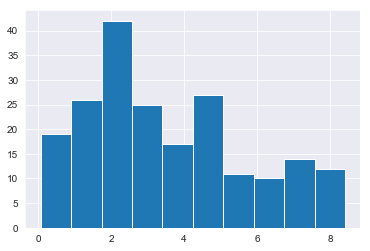

In [39]:
model_df[model_df['Total_weight_(kg)'] < 8.5]['Total_weight_(kg)'].hist();

In [40]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['Total_weight_(kg)'] < 8.5]))
# model_df = 
model_df[model_df['Total_weight_(kg)'] < 8.5].describe()
# model_df.describe()

Old length: 222
New length: 203


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,161.359606,0.511606,0.122649,0.237935,0.127810,3.543084,1.990049,8.009951,0.049172,0.134690,0.176291,0.024537,0.119596,0.058419,0.125330,0.080266,0.014734,0.214084,0.060640,0.134414,0.006901,0.077246,0.176394,1.396468,0.031074,0.030596,0.096842,0.192099,0.109059,0.054591,0.085123,0.073094,0.010325,0.009365
std,215.366746,0.281678,0.151273,0.189327,0.153247,2.210549,0.967040,6.430491,0.066679,0.137371,0.219043,0.083218,0.146927,0.125116,0.276889,0.147246,0.048154,0.824282,0.098329,0.219810,0.025242,0.189501,0.773951,1.480425,0.140041,0.058748,0.189728,0.479154,0.381786,0.240749,0.349780,0.321387,0.076743,0.059173
min,1.000000,0.000000,0.000000,0.002904,0.000000,0.072000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.500000,0.282576,0.024348,0.106751,0.018405,1.916000,1.370000,2.550000,0.000000,0.048000,0.031500,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,116.000000,0.527259,0.069151,0.190088,0.074602,3.009000,2.280000,6.450000,0.026000,0.087000,0.114000,0.000000,0.078000,0.013000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.813000,0.000000,0.008000,0.042000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,168.500000,0.737214,0.158839,0.307565,0.184568,5.007500,2.745000,12.210000,0.071000,0.197500,0.234000,0.017000,0.155000,0.069500,0.121500,0.108500,0.007250,0.000000,0.077500,0.164000,0.000000,0.000000,0.000000,2.352500,0.019500,0.029500,0.110000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1012.000000,0.997096,0.807692,1.000000,0.805203,8.403000,3.120000,24.120000,0.327000,0.831000,1.680000,0.970000,1.287000,1.318000,1.580000,0.691000,0.372000,7.102000,0.522000,1.384000,0.258000,1.128000,6.868000,5.585000,1.860000,0.390000,1.835000,3.280000,3.955000,2.780000,2.873000,3.670000,0.958000,0.616000


### Total Energy kWh > 0

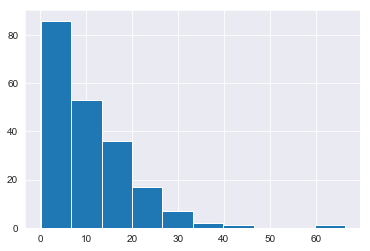

In [41]:
model_df[model_df['total_energy_kWh'] > 0]['total_energy_kWh'].hist();

In [42]:
print('Old length:', len(model_df))
print('New length:', len(model_df[model_df['total_energy_kWh'] > 0]))
model_df = model_df[model_df['total_energy_kWh'] > 0]
model_df.describe()

Old length: 222
New length: 203


,ID,Organics_wt_%,Paper_and_cardboard_wt_%,Plastics_wt_%,Non_combust_wt_%,Total_weight_(kg),energy_kWh_per_kg,total_energy_kWh,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,150.837438,0.581671,0.102716,0.202612,0.113001,4.467429,2.239507,10.828719,0.055281,0.152177,0.193089,0.026493,0.122443,0.084197,0.131039,0.10931,0.016037,0.438074,0.061759,0.141148,0.006473,0.096685,0.318650,1.780985,0.038532,0.035443,0.100256,0.236443,0.108665,0.049892,0.059069,0.076552,0.015709,0.008724
std,215.417160,0.243666,0.118657,0.156495,0.133238,3.099885,0.754762,9.259262,0.073372,0.150536,0.297970,0.084034,0.140924,0.362313,0.279114,0.25114,0.056742,1.582940,0.097475,0.233064,0.022966,0.212217,1.259931,1.894258,0.159708,0.067379,0.187934,0.532579,0.313441,0.236266,0.268518,0.317081,0.117911,0.058561
min,1.000000,0.013212,0.000000,0.000000,0.000000,0.381000,0.070000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.500000,0.419952,0.020788,0.085936,0.019243,2.178500,1.805000,4.110000,0.000000,0.056000,0.032000,0.000000,0.034500,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,103.000000,0.622937,0.065313,0.164926,0.069043,3.770000,2.490000,8.970000,0.030000,0.101000,0.117000,0.002000,0.086000,0.018000,0.000000,0.00000,0.000000,0.000000,0.018000,0.067000,0.000000,0.000000,0.000000,1.082000,0.000000,0.008000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,154.500000,0.755449,0.130994,0.269967,0.164237,6.170000,2.830000,14.895000,0.074500,0.210000,0.234000,0.020000,0.169000,0.074000,0.138500,0.15000,0.008000,0.000000,0.080000,0.167000,0.000000,0.131000,0.000000,2.867500,0.032500,0.036500,0.124500,0.000000,0.033000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1012.000000,1.000000,0.607659,0.854132,0.676783,21.274000,3.120000,66.370000,0.413000,0.960000,2.671000,0.970000,1.287000,4.904000,1.580000,2.82500,0.509000,12.615000,0.522000,1.384000,0.258000,1.128000,10.575000,11.764000,1.860000,0.390000,1.835000,3.280000,2.050000,2.780000,2.873000,3.670000,1.300000,0.616000


##  Train/Test Split

In [43]:
# X = model_df.drop(['ID',
#                    'total_energy_kWh',
#                    'energy_kWh_per_kg',
#                    'Total_weight_(kg)',
#                    'Organics_wt_%',
#                    'Paper_and_cardboard_wt_%',
#                    'Plastics_wt_%',
#                    'Non_combust_wt_%',
#                 ], axis=1)
# y = model_df[['total_energy_kWh']]

In [44]:
X = model_df.drop(['ID',
                   'total_energy_kWh',
                   'energy_kWh_per_kg',
                   'Total_weight_(kg)',
                   'Organics_wt_%',
                   'Paper_and_cardboard_wt_%',
                   'Plastics_wt_%',
                   'Non_combust_wt_%'], axis=1)
y = model_df[['energy_kWh_per_kg']]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_Scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_Scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

y_train_Scaled = scaler.fit_transform(y_train)
y_test_Scaled = scaler.transform(y_test)

In [47]:
X_train_Scaled.head()

,eps,plastic_bags,pet_bottles,pp,flexibles_film,other_plastic,feminine_hygiene,cardboard,drinkbags,nappies,hdpe_bottles,paper,aluminium_cans,jars,other_organics,food,lpb,aluminium_recyclable,steel_cans,other_sanitary_waste,textiles,other,bottles_wine_and_spirits,bottles_cds,other_metal,other_glass
0,-0.747969,0.238062,-0.662171,-0.301417,-0.282406,0.005154,-0.474114,1.102797,-0.277557,-0.273411,-0.133420,-0.601973,-0.29335,1.379923,1.064629,0.821974,6.258576,-0.520447,-0.518239,-0.433543,-0.356882,0.345286,-0.265436,-0.255029,10.044768,-0.125613
1,-0.132282,-0.609806,-0.252707,-0.301417,-0.975952,-0.199224,-0.474114,-0.181052,-0.277557,-0.273411,-0.615904,0.057513,-0.29335,-0.457027,-0.264657,1.317416,-0.237986,-0.460600,-0.518239,-0.108145,0.767750,-0.223877,-0.265436,-0.255029,0.654199,-0.125613
2,0.525384,0.386102,-0.530309,-0.068097,2.320530,-0.176231,1.757036,1.212302,-0.277557,-0.273411,2.932367,-0.601973,-0.29335,0.693536,-0.264657,3.046914,0.052818,-0.460600,0.133539,0.209641,-0.064942,-0.223877,-0.265436,-0.255029,-0.145332,-0.125613
3,-0.747969,0.009272,0.593980,-0.301417,0.513887,0.005154,1.240534,1.993939,0.218441,0.742610,-0.615904,-0.601973,-0.29335,0.950314,-0.264657,-0.247777,10.579924,0.018180,-0.179315,-0.433543,-0.356882,-0.223877,-0.265436,-0.255029,-0.145332,-0.125613
4,-0.104296,1.092659,0.170637,-0.231421,-0.111160,-0.051050,3.306544,2.167636,-0.277557,-0.273411,-0.615904,0.563534,-0.29335,0.135538,-0.255046,-0.402982,-0.179825,-0.535409,-0.075030,-0.433543,-0.064942,-0.223877,-0.265436,-0.255029,-0.145332,-0.125613


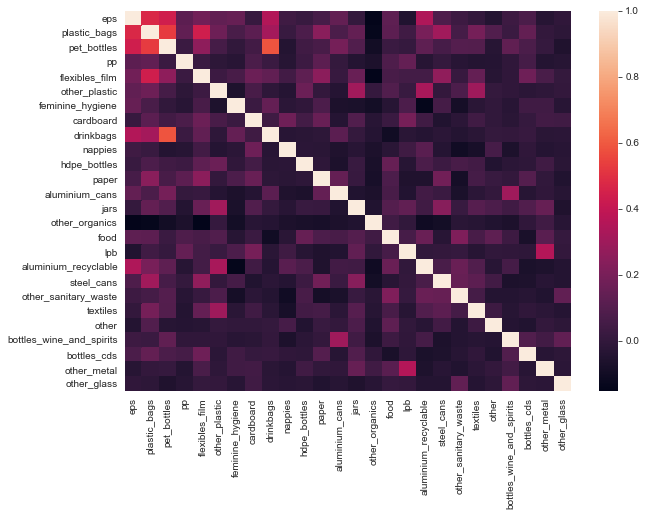

In [48]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train_Scaled.corr());

## Statsmodel OLS

In [49]:
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('ggplot')

X_int = sm.tools.add_constant(X)
model = OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_kWh_per_kg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     10.38
Date:                Tue, 27 Oct 2020   Prob (F-statistic):           8.13e-24
Time:                        11:37:32   Log-Likelihood:                -136.05
No. Observations:                 203   AIC:                             326.1
Df Residuals:                     176   BIC:                             415.6
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        2.1550      0.076     28.315      0.000       2.005       2.305
eps                         -0.3004      0.609     -0.494      0.622      -1.502       0.901
plastic_bags                 0.1142      0.321      0.356      0.722      -0.519       0.748
pet_bottles                 -0.2018      0.163     -1.241      0.216      -0.523       0.119
pp                          -0.1842      0.457     -0.403      0.687      -1.086       0.718
flexibles_film              -0.6919      0.291     -2.382      0.018      -1.265      -0.119
other_plastic               -0.0113      0.115     -0.099      0.922      -0.238       0.216
feminine_hygiene             0.3891      0.137      2.844      0.005       0.119       0.659
cardboard                   -0.0484      0.150     -0.321      0.748      -0.345       0.249
drinkbags                   -0.2937      0.792     -0.371      0.711      -1.857       1.270
nappies                      0.1303      0.024      5.468      0.000       0.083       0.177
hdpe_bottles                -0.1489      0.385     -0.387      0.699      -0.908       0.610
paper                       -0.2852      0.167     -1.712      0.089      -0.614       0.044
aluminium_cans               0.2845      1.666      0.171      0.865      -3.002       3.571
jars                        -0.8157      0.195     -4.191      0.000      -1.200      -0.432
other_organics               0.0861      0.030      2.898      0.004       0.027       0.145
food                         0.1931      0.021      9.140      0.000       0.151       0.235
lpb                         -0.0200      0.253     -0.079      0.937      -0.519       0.479
aluminium_recyclable        -0.7708      0.605     -1.275      0.204      -1.964       0.422
steel_cans                  -0.3600      0.222     -1.621      0.107      -0.798       0.078
other_sanitary_waste         0.2711      0.074      3.672      0.000       0.125       0.417
textiles                    -0.3036      0.121     -2.502      0.013      -0.543      -0.064
other                       -0.4153      0.156     -2.656      0.009      -0.724      -0.107
bottles_wine_and_spirits    -0.4778      0.138     -3.456      0.001      -0.751      -0.205
bottles_cds                 -0.4283      0.118     -3.624      0.000      -0.662      -0.195
other_metal                 -0.3524      0.335     -1.053      0.294      -1.013       0.308
other_glass                 -1.0713      0.625     -1.713      0.088      -2.305       0.163
==============================================================================
Omnibus:                       63.258   Durbin-Watson:                   2.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.384
Skew:                          -1.432   Prob(JB):       

In [50]:
# from statsmodels.regression.linear_model import OLS
# import statsmodels.api as sm
# import statsmodels.stats.api as sms
# import statsmodels.formula.api as smf
# import scipy.stats as stats
# plt.style.use('ggplot')

# X_int = sm.tools.add_constant(X)
# model = OLS(y, X_int).fit()
# model.summary()

In [51]:
#
# results = []
# print('Model Residuals Plot')
# print('--------------------')
# fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
# plt.show()
# for idx, column in enumerate(X.columns):
#     print(f'Belize MSW Regression Plot for {column} Feature')
#     print('------------------------------------------------')
    
#     fig, axes = plt.subplots(figsize=(15,12))
#     fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
#     fig.tight_layout()
#     plt.show()
    
#     input('Press ENTER to continue...')

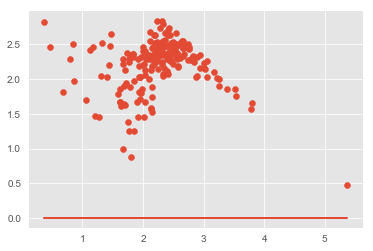

In [52]:
# Plot redisuals from Statsmodel OLS
plt.scatter(model.predict(X_int), scaler.inverse_transform(model.resid))
plt.plot(model.predict(X_int), [0 for i in range(len(X_int))]);

In [53]:
model.predict(X_int)

0      2.139099
1      2.326611
2      2.661749
3      2.148512
4      2.648473
5      2.866654
6      2.192307
7      1.129937
8      1.765211
9      2.581653
10     2.011261
12     2.112029
13     1.693373
14     2.931783
15     0.460430
16     2.602826
17     1.770426
18     3.512874
19     2.490903
20     2.802381
21     1.843904
22     2.017375
23     2.036829
24     2.450223
25     2.150407
26     1.208951
27     2.048415
28     1.720964
29     2.099140
30     2.600157
31     1.446522
32     2.341341
33     2.072370
34     1.266742
35     2.464863
36     1.588406
37     2.511977
38     2.847916
39     2.405184
40     2.575148
41     2.465906
42     2.172108
43     2.096850
44     2.173011
45     2.054298
46     2.290888
47     2.393557
48     3.217321
49     2.249291
50     2.321219
51     2.554003
52     1.792204
53     2.889037
54     1.308553
55     2.655398
56     1.180041
57     2.096606
58     3.051325
59     2.145164
60     3.806087
61     3.021934
62     2.737910
63     1

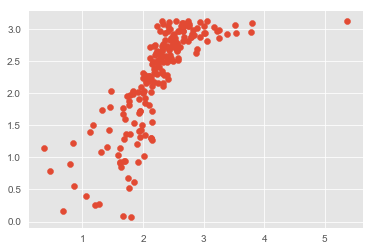

In [54]:
plt.scatter(model.predict(X_int), y)

In [55]:
model.resid.mean()

-9.308372354246386e-16

## Scikit Learn LinearRegression Model

In [56]:
from sklearn.linear_model import LinearRegression, LassoCV
linreg = LinearRegression()
linreg.fit(X_train_Scaled, y_train_Scaled)

y_hat_train_scaled = linreg.predict(X_train_Scaled)
y_hat_test_scaled = linreg.predict(X_test_Scaled)

train_residuals = scaler.inverse_transform(y_hat_train_scaled) - y_train
test_residuals = scaler.inverse_transform(y_hat_test_scaled) - y_test

train_mse = mean_squared_error(y_train, scaler.inverse_transform(y_hat_train_scaled))
test_mse = mean_squared_error(y_test, scaler.inverse_transform(y_hat_test_scaled))

print('Train RMSE:', np.sqrt(train_mse))
print('------------------------------')
print('Test RMSE:', np.sqrt(test_mse))
linreg.score(X_test_Scaled, y_test_Scaled)

Train RMSE: 0.4822261622903918
------------------------------
Test RMSE: 0.46101957706134156


0.4672503720329061

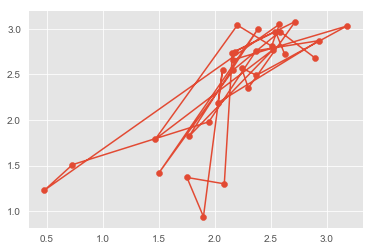

In [57]:
plt.scatter(scaler.inverse_transform(y_hat_test_scaled), y_test)
plt.plot(scaler.inverse_transform(y_hat_test_scaled), y_test);

Sklearn Model Intercept: [-5.93407045e-17]


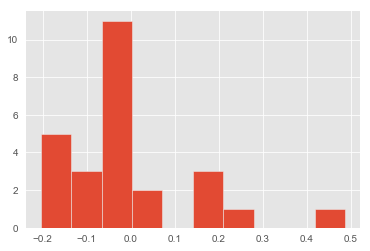

In [58]:
sklearn_results = pd.DataFrame()
sklearn_results['Item'] = [x for x in X_train_Scaled.columns]
sklearn_results['Coef'] = [x for x in linreg.coef_[0]]
print('Sklearn Model Intercept:', linreg.intercept_)
sklearn_results['Coef'].hist();

## Decision Tree Regressor

### Baseline Model

In [59]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [60]:
from sklearn.metrics import r2_score

y_pred = regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 0.4712064132320014
R-sq Score: 0.44344664575141046


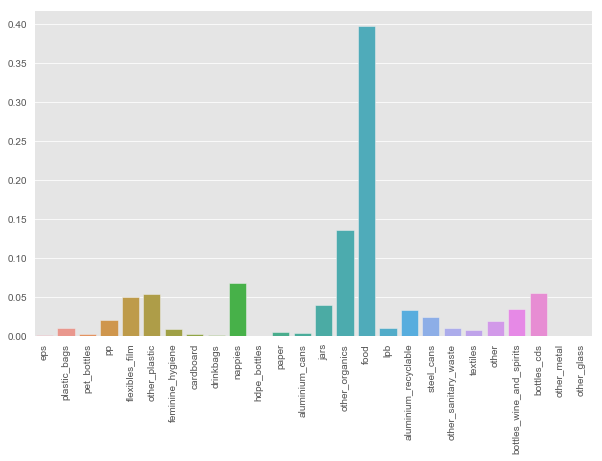

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

### Optimized Model

In [62]:
op_regressor = DecisionTreeRegressor(random_state=42,
                                     max_depth=4,
                                     min_samples_leaf=2,
                                     min_samples_split=4)
op_regressor.fit(X_train_Scaled, y_train_Scaled)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=4, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [63]:
y_pred = op_regressor.predict(X_test_Scaled)
y_pred = scaler.inverse_transform(y_pred)

print('RMSE Score:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-sq Score:', r2_score(y_test, y_pred))

RMSE Score: 0.44495011119489974
R-sq Score: 0.5037425284757915


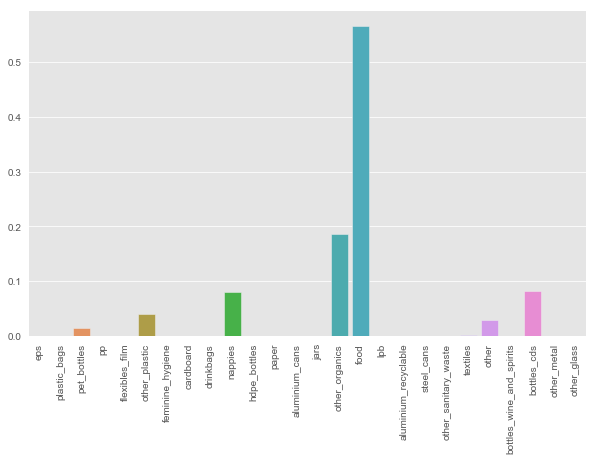

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(X_train_Scaled.columns, op_regressor.feature_importances_, orient="v");
plt.xticks(rotation=90);

## Random Forest Model

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image  
from pydotplus import graph_from_dot_data
import pydotplus
from sklearn.pipeline import Pipeline

### Baseline Model

In [66]:
rdm_forest = RandomForestRegressor(200, random_state=42)

In [67]:
rdm_forest.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [68]:
rdm_forest.score(X_train_Scaled, y_train_Scaled)

0.9388366492643752

In [69]:
rdm_forest.score(X_test_Scaled, y_test_Scaled)

0.6115631557384105

In [70]:
y_preds = rdm_forest.predict(X_test_Scaled)
y_preds

array([ 0.29215753,  0.60412242,  0.08008895,  0.76448914,  0.23460998,
        0.56430679,  0.63198687,  0.66290407,  0.68752091,  0.44752293,
       -0.85976782, -0.57365385, -0.86152152,  0.50156307,  0.40543398,
        0.0476129 ,  0.61945112, -0.092164  ,  0.51422873, -0.68816439,
        0.47506262,  0.06489016,  0.61477457,  0.36639777,  0.39796449,
       -0.92075783,  0.78332525, -0.45362239,  0.32450367,  0.81235883,
        0.3113184 ])

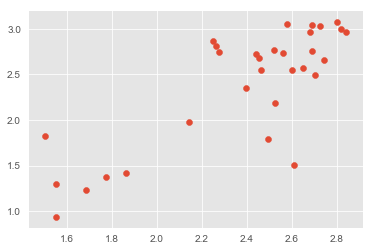

In [71]:
# Plot redisuals from Random Forest

plt.scatter(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);
# plt.plot(scaler.inverse_transform(rdm_forest.predict(X_test_Scaled)), y_test);

In [72]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

0.3936570186170337

### GridSearch CV

In [73]:
rf_grid_reg = RandomForestRegressor(random_state=42)
grid_param = [{'n_estimators': [200, 250, 300],
               'max_depth': [15, 17, 20],
               'min_samples_split': [2, 3, 4],
               'min_samples_leaf': [1, 2]}]

In [74]:
# rf_gridsearch = GridSearchCV(rf_grid_reg, grid_param, cv=3)
# rf_gridsearch.fit(X_train_Scaled, y_train_Scaled)

In [75]:
# rf_gridsearch.best_params_

In [76]:
# rf_gridsearch.score(X_test_Scaled, y_test_Scaled)

In [77]:
optimal_rf_model = RandomForestRegressor(max_depth=17,
                                         min_samples_leaf=1,
                                         min_samples_split=3,
                                         n_estimators=250,
                                         random_state=42)
optimal_rf_model.fit(X_train_Scaled, y_train_Scaled)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=17,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [78]:
optimal_rf_model.score(X_train_Scaled, y_train_Scaled)

0.9359698931875803

In [79]:
optimal_rf_model.score(X_test_Scaled, y_test_Scaled)

0.6059109550240522

In [80]:
y_preds = optimal_rf_model.predict(X_test_Scaled)
y_preds

array([ 0.28100829,  0.58789393,  0.02538147,  0.7703738 ,  0.23780302,
        0.55649312,  0.65212289,  0.67451255,  0.7357492 ,  0.47248445,
       -0.82315401, -0.56858994, -0.8073662 ,  0.55532608,  0.41900117,
       -0.00133932,  0.62499889, -0.13907054,  0.49969233, -0.67669249,
        0.50632635,  0.08604388,  0.61174904,  0.35143503,  0.372481  ,
       -0.9325869 ,  0.77568626, -0.51784739,  0.33912717,  0.82567178,
        0.32996237])

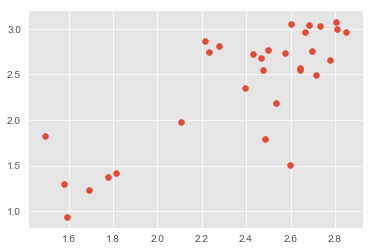

In [81]:
plt.scatter(scaler.inverse_transform(optimal_rf_model.predict(X_test_Scaled)), y_test);

In [82]:
np.sqrt(mean_squared_error(y_test, scaler.inverse_transform(y_preds)))

0.39651075494040466

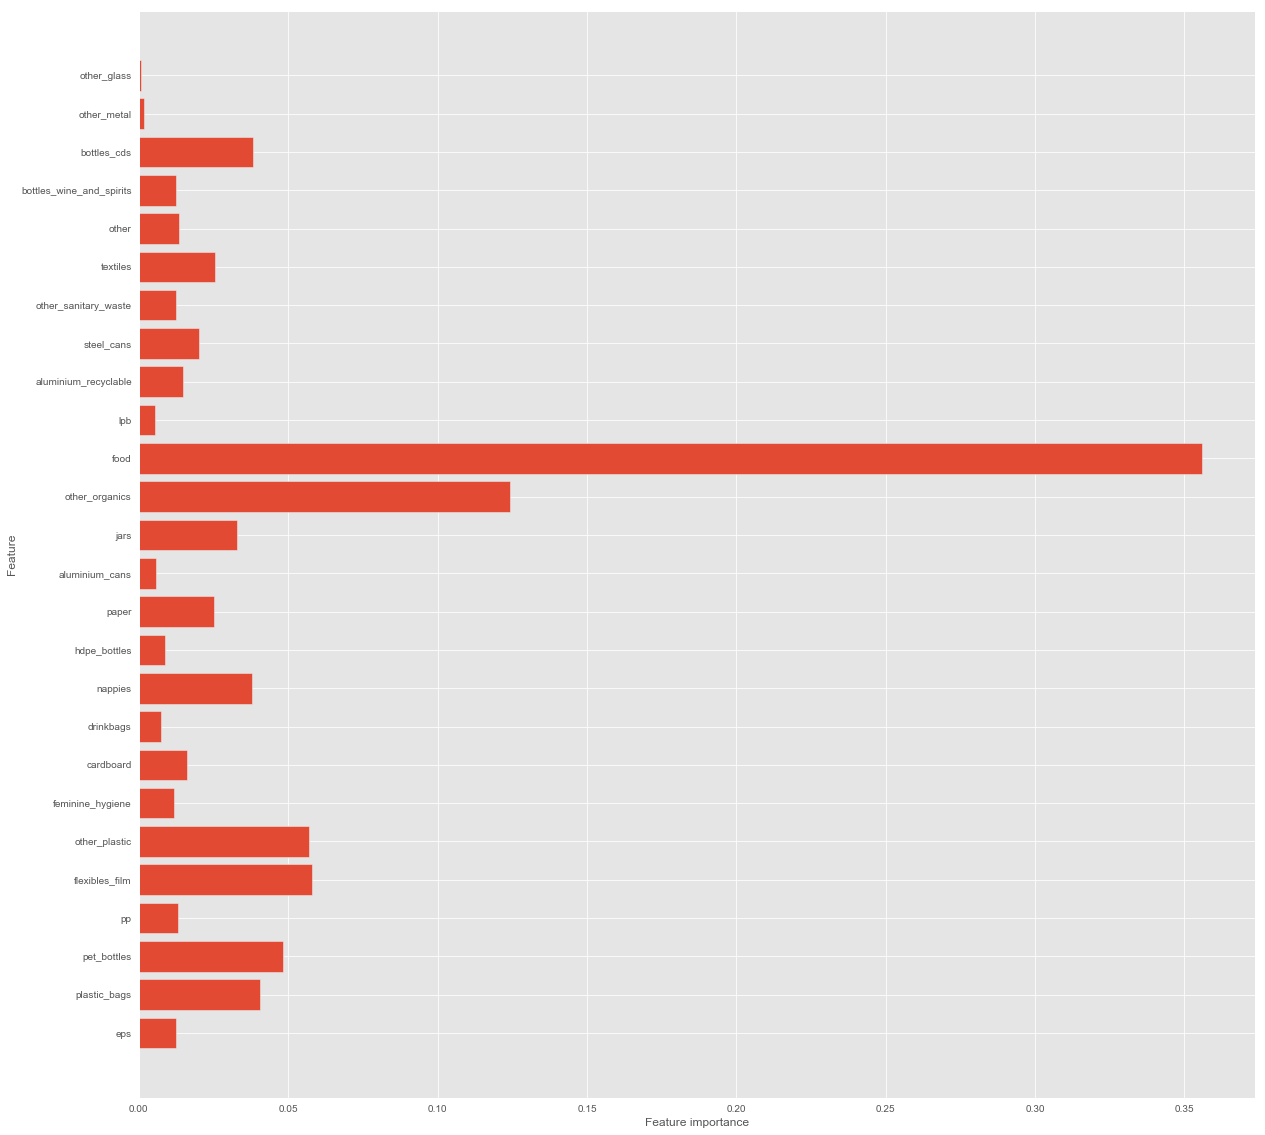

In [83]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(optimal_rf_model)

## MLP Regression Model

In [84]:
from keras import layers, models, optimizers, regularizers
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from keras.wrappers.scikit_learn import KerasRegressor

In [85]:
n_features = X_train_Scaled.shape[1]

### Loss, MSE, & R^2 Visualization Function

In [86]:
def coef_determination(y_true, y_pred):
    SS_res = K.sum(K.square(y_true-y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

In [87]:
#Build vizualization function for training/validation loss and accuracy
def visualize_loss_MSE(results):
    history = results.history
    
    plt.plot(history['loss'], 'b', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['mse'], 'b', label='Training MSE')
    plt.title('Training MSE')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('MSE', fontsize=12)
    plt.legend(loc='best')
    plt.show()
    
    plt.plot(history['coef_determination'], 'b', label='Training R^2')
    plt.title('Training R^2')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('R^2', fontsize=12)
    plt.legend(loc='best')
    plt.show()

### Baseline Model

In [88]:
baseline_model = Sequential()

baseline_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

baseline_model.add(layers.Dense(5, activation='relu'))

baseline_model.add(layers.Dense(1, activation='linear'))

baseline_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [89]:
baseline_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 665us/step - loss: 1.0344 - mse: 1.0344 - coef_determination: -0.0725
Epoch 2/150
6/6 [==============================] - 0s 665us/step - loss: 0.9789 - mse: 0.9789 - coef_determination: -0.0139
Epoch 3/150
6/6 [==============================] - 0s 665us/step - loss: 0.9469 - mse: 0.9469 - coef_determination: 0.0298
Epoch 4/150
6/6 [==============================] - 0s 665us/step - loss: 0.9236 - mse: 0.9236 - coef_determination: 0.0187
Epoch 5/150
6/6 [==============================] - 0s 667us/step - loss: 0.8981 - mse: 0.8981 - coef_determination: 0.0805
Epoch 6/150
6/6 [==============================] - 0s 668us/step - loss: 0.8782 - mse: 0.8782 - coef_determination: 0.0218
Epoch 7/150
6/6 [==============================] - 0s 664us/step - loss: 0.8569 - mse: 0.8569 - coef_determination: 0.1405
Epoch 8/150
6/6 [==============================] - 0s 831us/step - loss: 0.8408 - mse: 0.8408 - coef_determination: 0.0548
Epoch 9/150
6/

6/6 [==============================] - 0s 831us/step - loss: 0.2821 - mse: 0.2821 - coef_determination: 0.7132
Epoch 68/150
6/6 [==============================] - 0s 665us/step - loss: 0.2771 - mse: 0.2771 - coef_determination: 0.7043
Epoch 69/150
6/6 [==============================] - 0s 665us/step - loss: 0.2723 - mse: 0.2723 - coef_determination: 0.6854
Epoch 70/150
6/6 [==============================] - 0s 831us/step - loss: 0.2687 - mse: 0.2687 - coef_determination: 0.6923
Epoch 71/150
6/6 [==============================] - 0s 831us/step - loss: 0.2631 - mse: 0.2631 - coef_determination: 0.6941
Epoch 72/150
6/6 [==============================] - 0s 665us/step - loss: 0.2600 - mse: 0.2600 - coef_determination: 0.7343
Epoch 73/150
6/6 [==============================] - 0s 666us/step - loss: 0.2570 - mse: 0.2570 - coef_determination: 0.7392
Epoch 74/150
6/6 [==============================] - 0s 665us/step - loss: 0.2512 - mse: 0.2512 - coef_determination: 0.7449
Epoch 75/150
6/6 [===

6/6 [==============================] - 0s 665us/step - loss: 0.1133 - mse: 0.1133 - coef_determination: 0.8668
Epoch 133/150
6/6 [==============================] - 0s 665us/step - loss: 0.1130 - mse: 0.1130 - coef_determination: 0.8814
Epoch 134/150
6/6 [==============================] - 0s 665us/step - loss: 0.1110 - mse: 0.1110 - coef_determination: 0.8716
Epoch 135/150
6/6 [==============================] - 0s 665us/step - loss: 0.1101 - mse: 0.1101 - coef_determination: 0.8811
Epoch 136/150
6/6 [==============================] - 0s 665us/step - loss: 0.1092 - mse: 0.1092 - coef_determination: 0.8789
Epoch 137/150
6/6 [==============================] - 0s 665us/step - loss: 0.1083 - mse: 0.1083 - coef_determination: 0.8881
Epoch 138/150
6/6 [==============================] - 0s 665us/step - loss: 0.1071 - mse: 0.1071 - coef_determination: 0.8846
Epoch 139/150
6/6 [==============================] - 0s 665us/step - loss: 0.1048 - mse: 0.1048 - coef_determination: 0.8943
Epoch 140/150


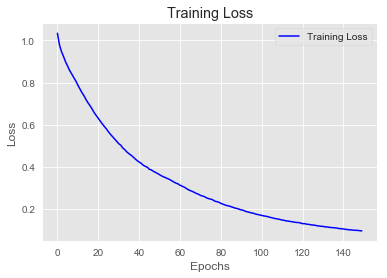

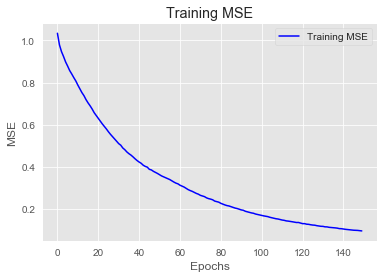

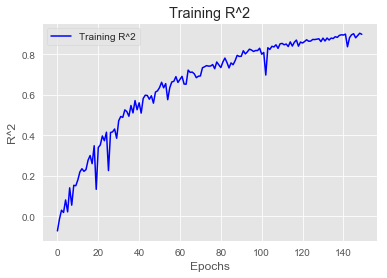

In [90]:
visualize_loss_MSE(baseline_model.history)

In [91]:
baseline_preds_scaled = baseline_model.predict(X_test_Scaled)
baseline_preds = scaler.inverse_transform(baseline_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

print('RMSE:', rmse)
print('-------------------------')
print(baseline_model.summary())

RMSE: 0.5596529849931813
-------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________
None


### Overfit Model

In [92]:
overfit_model = Sequential()

overfit_model.add(layers.Dense(10, activation='relu', input_shape=(n_features, )))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(10, activation='relu'))

overfit_model.add(layers.Dense(1, activation='linear'))

overfit_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [93]:
overfit_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 828us/step - loss: 0.9869 - mse: 0.9869 - coef_determination: -0.0172
Epoch 2/150
6/6 [==============================] - 0s 663us/step - loss: 0.9638 - mse: 0.9638 - coef_determination: 0.0372
Epoch 3/150
6/6 [==============================] - 0s 665us/step - loss: 0.9528 - mse: 0.9528 - coef_determination: 0.0068
Epoch 4/150
6/6 [==============================] - 0s 828us/step - loss: 0.9410 - mse: 0.9410 - coef_determination: 0.0253
Epoch 5/150
6/6 [==============================] - 0s 830us/step - loss: 0.9321 - mse: 0.9321 - coef_determination: 0.0281
Epoch 6/150
6/6 [==============================] - 0s 665us/step - loss: 0.9272 - mse: 0.9272 - coef_determination: -0.0110
Epoch 7/150
6/6 [==============================] - 0s 666us/step - loss: 0.9171 - mse: 0.9171 - coef_determination: 0.0691
Epoch 8/150
6/6 [==============================] - 0s 667us/step - loss: 0.9079 - mse: 0.9079 - coef_determination: -0.0095
Epoch 9/150
6

6/6 [==============================] - 0s 836us/step - loss: 0.5687 - mse: 0.5687 - coef_determination: 0.4060
Epoch 68/150
6/6 [==============================] - 0s 831us/step - loss: 0.5643 - mse: 0.5643 - coef_determination: 0.3802
Epoch 69/150
6/6 [==============================] - 0s 831us/step - loss: 0.5607 - mse: 0.5607 - coef_determination: 0.3741
Epoch 70/150
6/6 [==============================] - 0s 831us/step - loss: 0.5559 - mse: 0.5559 - coef_determination: 0.4265
Epoch 71/150
6/6 [==============================] - 0s 831us/step - loss: 0.5539 - mse: 0.5539 - coef_determination: 0.4270
Epoch 72/150
6/6 [==============================] - 0s 830us/step - loss: 0.5483 - mse: 0.5483 - coef_determination: 0.4230
Epoch 73/150
6/6 [==============================] - 0s 831us/step - loss: 0.5479 - mse: 0.5479 - coef_determination: 0.4224
Epoch 74/150
6/6 [==============================] - 0s 831us/step - loss: 0.5460 - mse: 0.5460 - coef_determination: 0.4186
Epoch 75/150
6/6 [===

6/6 [==============================] - 0s 835us/step - loss: 0.2896 - mse: 0.2896 - coef_determination: 0.6927
Epoch 133/150
6/6 [==============================] - 0s 838us/step - loss: 0.2854 - mse: 0.2854 - coef_determination: 0.7061
Epoch 134/150
6/6 [==============================] - 0s 665us/step - loss: 0.2800 - mse: 0.2800 - coef_determination: 0.7024
Epoch 135/150
6/6 [==============================] - 0s 835us/step - loss: 0.2762 - mse: 0.2762 - coef_determination: 0.7125
Epoch 136/150
6/6 [==============================] - 0s 831us/step - loss: 0.2699 - mse: 0.2699 - coef_determination: 0.7386
Epoch 137/150
6/6 [==============================] - 0s 663us/step - loss: 0.2676 - mse: 0.2676 - coef_determination: 0.7253
Epoch 138/150
6/6 [==============================] - 0s 830us/step - loss: 0.2647 - mse: 0.2647 - coef_determination: 0.7082
Epoch 139/150
6/6 [==============================] - 0s 831us/step - loss: 0.2588 - mse: 0.2588 - coef_determination: 0.6745
Epoch 140/150


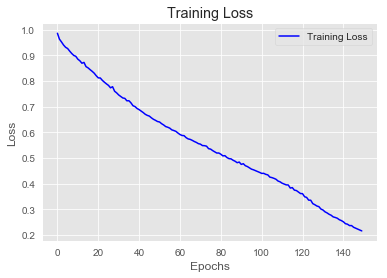

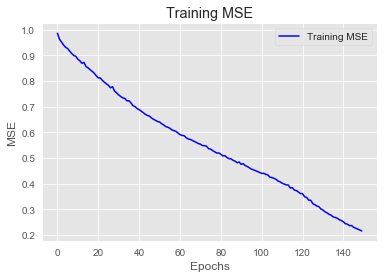

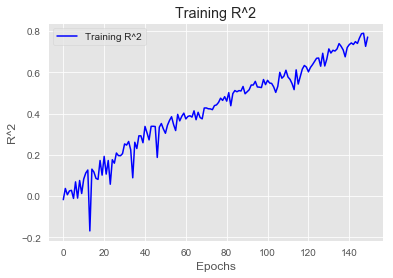

In [94]:
visualize_loss_MSE(overfit_model.history)

In [95]:
overfit_preds_scaled = overfit_model.predict(X_test_Scaled)
overfit_preds = scaler.inverse_transform(overfit_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, overfit_preds))

print('RMSE:', rmse)
print('-------------------------')
print(overfit_model.summary())

RMSE: 0.48089715564537433
-------------------------
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________
None


### Regularized Model

In [96]:
reg_model = Sequential()

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(10, kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

reg_model.add(layers.Dense(1, activation='linear'))

reg_model.compile(optimizer='SGD',
              loss='mse',
              metrics=['mse', coef_determination])


In [97]:
reg_model.fit(X_train_Scaled,
                  y_train_Scaled,
                  epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 997us/step - loss: 1.2369 - mse: 0.9717 - coef_determination: -0.0012
Epoch 2/150
6/6 [==============================] - 0s 833us/step - loss: 1.2255 - mse: 0.9606 - coef_determination: 0.0078
Epoch 3/150
6/6 [==============================] - 0s 829us/step - loss: 1.2184 - mse: 0.9538 - coef_determination: 0.0133
Epoch 4/150
6/6 [==============================] - 0s 830us/step - loss: 1.2098 - mse: 0.9455 - coef_determination: 0.0500
Epoch 5/150
6/6 [==============================] - 0s 997us/step - loss: 1.2005 - mse: 0.9364 - coef_determination: 0.0503
Epoch 6/150
6/6 [==============================] - 0s 832us/step - loss: 1.1931 - mse: 0.9292 - coef_determination: 0.0360
Epoch 7/150
6/6 [==============================] - 0s 663us/step - loss: 1.1787 - mse: 0.9150 - coef_determination: 0.0407
Epoch 8/150
6/6 [==============================] - 0s 834us/step - loss: 1.1630 - mse: 0.8995 - coef_determination: 0.0905
Epoch 9/150
6/6

6/6 [==============================] - 0s 827us/step - loss: 0.4770 - mse: 0.2216 - coef_determination: 0.7596
Epoch 67/150
6/6 [==============================] - 0s 831us/step - loss: 0.4695 - mse: 0.2143 - coef_determination: 0.7672
Epoch 68/150
6/6 [==============================] - 0s 831us/step - loss: 0.4683 - mse: 0.2132 - coef_determination: 0.7927
Epoch 69/150
6/6 [==============================] - 0s 831us/step - loss: 0.4615 - mse: 0.2065 - coef_determination: 0.7777
Epoch 70/150
6/6 [==============================] - 0s 831us/step - loss: 0.4577 - mse: 0.2029 - coef_determination: 0.7838
Epoch 71/150
6/6 [==============================] - 0s 831us/step - loss: 0.4515 - mse: 0.1971 - coef_determination: 0.7895
Epoch 72/150
6/6 [==============================] - 0s 831us/step - loss: 0.4496 - mse: 0.1951 - coef_determination: 0.8060
Epoch 73/150
6/6 [==============================] - 0s 831us/step - loss: 0.4426 - mse: 0.1882 - coef_determination: 0.8086
Epoch 74/150
6/6 [===

6/6 [==============================] - 0s 665us/step - loss: 0.3112 - mse: 0.0674 - coef_determination: 0.9201
Epoch 132/150
6/6 [==============================] - 0s 831us/step - loss: 0.3135 - mse: 0.0699 - coef_determination: 0.8952
Epoch 133/150
6/6 [==============================] - 0s 671us/step - loss: 0.3082 - mse: 0.0649 - coef_determination: 0.9258
Epoch 134/150
6/6 [==============================] - 0s 831us/step - loss: 0.3082 - mse: 0.0651 - coef_determination: 0.9352
Epoch 135/150
6/6 [==============================] - 0s 831us/step - loss: 0.3064 - mse: 0.0634 - coef_determination: 0.9346
Epoch 136/150
6/6 [==============================] - 0s 831us/step - loss: 0.3054 - mse: 0.0626 - coef_determination: 0.9307
Epoch 137/150
6/6 [==============================] - 0s 831us/step - loss: 0.3046 - mse: 0.0620 - coef_determination: 0.9299
Epoch 138/150
6/6 [==============================] - 0s 666us/step - loss: 0.3045 - mse: 0.0621 - coef_determination: 0.9377
Epoch 139/150


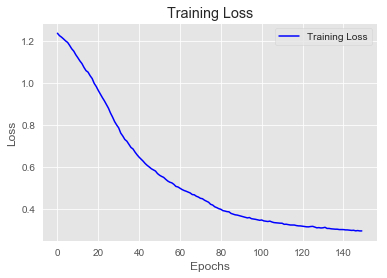

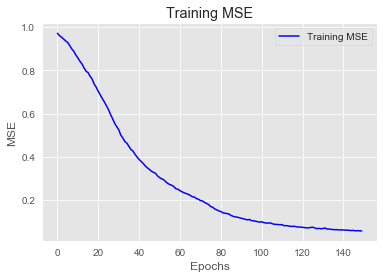

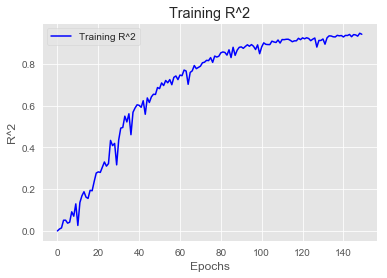

In [98]:
visualize_loss_MSE(reg_model.history)

In [99]:
reg_preds_scaled = reg_model.predict(X_test_Scaled)
reg_preds = scaler.inverse_transform(reg_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, reg_preds))

print('RMSE:', rmse)
print('-------------------------')
print(reg_model.summary())

RMSE: 0.28999050369952
-------------------------
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                270       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 721
Trainable params: 721
Non-trainable params: 0
_______

### Optimized Model

In [100]:
otptimized_model = Sequential()

otptimized_model.add(layers.Dense(35,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu', input_shape=(n_features, )))

otptimized_model.add(layers.Dense(15,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

otptimized_model.add(layers.Dense(3,
                                  kernel_regularizer=regularizers.L2(0.005),
                           activation='relu'))

otptimized_model.add(layers.Dense(1, activation='linear'))

otptimized_model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['mse', coef_determination])

In [101]:
otptimized_model.fit(X_train_Scaled,
                     y_train_Scaled,
                     epochs=150,
                     batch_size=5)

Epoch 1/150
35/35 [==============================] - 0s 826us/step - loss: 1.2308 - mse: 0.9561 - coef_determination: -0.8348
Epoch 2/150
35/35 [==============================] - 0s 826us/step - loss: 1.0630 - mse: 0.7942 - coef_determination: -5.4383
Epoch 3/150
35/35 [==============================] - 0s 798us/step - loss: 0.9490 - mse: 0.6854 - coef_determination: -1.6485
Epoch 4/150
35/35 [==============================] - 0s 769us/step - loss: 0.8416 - mse: 0.5822 - coef_determination: -1.6232
Epoch 5/150
35/35 [==============================] - 0s 798us/step - loss: 0.7597 - mse: 0.5042 - coef_determination: 0.0573
Epoch 6/150
35/35 [==============================] - 0s 798us/step - loss: 0.6769 - mse: 0.4245 - coef_determination: 0.0610
Epoch 7/150
35/35 [==============================] - 0s 769us/step - loss: 0.6198 - mse: 0.3707 - coef_determination: 0.2796
Epoch 8/150
35/35 [==============================] - 0s 798us/step - loss: 0.5754 - mse: 0.3300 - coef_determination: 0.5

35/35 [==============================] - 0s 682us/step - loss: 0.0997 - mse: 0.0167 - coef_determination: 0.9637
Epoch 67/150
35/35 [==============================] - 0s 866us/step - loss: 0.0954 - mse: 0.0131 - coef_determination: 0.9451
Epoch 68/150
35/35 [==============================] - 0s 706us/step - loss: 0.0958 - mse: 0.0147 - coef_determination: 0.9498
Epoch 69/150
35/35 [==============================] - 0s 685us/step - loss: 0.0935 - mse: 0.0134 - coef_determination: 0.9661
Epoch 70/150
35/35 [==============================] - 0s 683us/step - loss: 0.0931 - mse: 0.0143 - coef_determination: 0.9747
Epoch 71/150
35/35 [==============================] - 0s 742us/step - loss: 0.0897 - mse: 0.0122 - coef_determination: 0.9054
Epoch 72/150
35/35 [==============================] - 0s 655us/step - loss: 0.0912 - mse: 0.0147 - coef_determination: 0.9713
Epoch 73/150
35/35 [==============================] - 0s 711us/step - loss: 0.0900 - mse: 0.0144 - coef_determination: 0.9717
Epoch

35/35 [==============================] - 0s 741us/step - loss: 0.0604 - mse: 0.0126 - coef_determination: 0.9721
Epoch 130/150
35/35 [==============================] - 0s 883us/step - loss: 0.0580 - mse: 0.0105 - coef_determination: 0.9815
Epoch 131/150
35/35 [==============================] - 0s 855us/step - loss: 0.0607 - mse: 0.0134 - coef_determination: 0.9690
Epoch 132/150
35/35 [==============================] - 0s 798us/step - loss: 0.0577 - mse: 0.0107 - coef_determination: 0.9752
Epoch 133/150
35/35 [==============================] - 0s 741us/step - loss: 0.0574 - mse: 0.0106 - coef_determination: 0.9702
Epoch 134/150
35/35 [==============================] - 0s 684us/step - loss: 0.0599 - mse: 0.0133 - coef_determination: 0.9336
Epoch 135/150
35/35 [==============================] - 0s 741us/step - loss: 0.0597 - mse: 0.0137 - coef_determination: 0.9747
Epoch 136/150
35/35 [==============================] - 0s 856us/step - loss: 0.0579 - mse: 0.0119 - coef_determination: 0.978

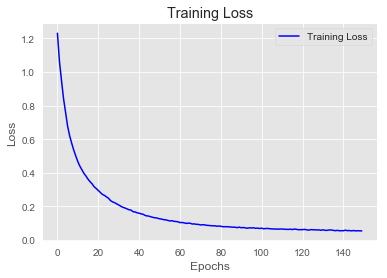

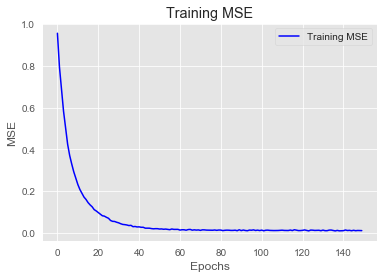

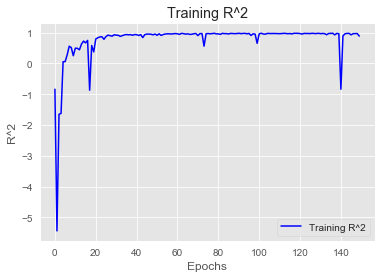

In [102]:
visualize_loss_MSE(otptimized_model.history)

In [103]:
op_preds_scaled = otptimized_model.predict(X_test_Scaled)
op_preds = scaler.inverse_transform(op_preds_scaled)
rmse = np.sqrt(mean_squared_error(y_test, op_preds))

print('RMSE:', rmse)
print('-------------------------')
print(otptimized_model.summary())

RMSE: 0.43988137409867883
-------------------------
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 35)                945       
_________________________________________________________________
dense_15 (Dense)             (None, 15)                540       
_________________________________________________________________
dense_16 (Dense)             (None, 3)                 48        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 4         
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
